## Interferencia zdrojov

V štandardných zdrojoch v MEEP nie je možné definovať fázové parametre vyžarovanej elektromagnetickej vlny. Ak potrebujeme simulovať interferenciu niekoľkých zdrojov s rôznymi fázovými posunmi, môžeme využiť [CustomSource](https://meep.readthedocs.io/en/latest/Python_User_Interface/#customsource), kde vo funkcii definujúcej parametre zdroja určíme parametre zdroja - fázový posun, časové oneskorenie a pod.


Using MPI version 3.1, 1 processes
-----------
Initializing structure...
Working in 2D dimensions.
Computational cell is 100 x 100 x 0 with resolution 4
time for set_epsilon = 0.191787 s
-----------
run 0 finished at t = 50.0 (400 timesteps)


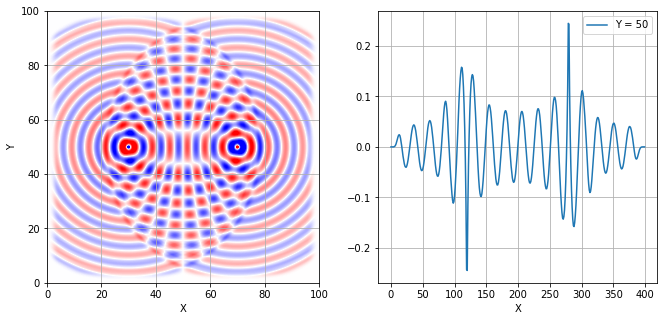

In [1]:
%matplotlib inline
from utils.mp_src_plot import *

def src_01(t):            # spojity zdroj
    return np.sin(t)  

def src_02(t):            # spojity zdroj s fazovym posunom PI
    return np.sin(t - np.pi)

sources = [mp.Source(mp.CustomSource(src_func=src_01), 
                component = mp.Ez,
                center = mp.Vector3(-20,0,0)),
           
           mp.Source(mp.CustomSource(src_func=src_02), 
                component = mp.Ez,
                center = mp.Vector3(20,0,0))
          ]
                     
sim = mp.Simulation(cell_size=area, boundary_layers=[mp.PML(5.0)],
                    geometry=[], sources=sources, resolution=4)

sim.run(until=50)
data = sim.get_array(center=mp.Vector3(), size=area, component=mp.Ez)
src_plot(dx, dy, data.transpose(), 4)

<!---  REMOVE -->  
### Animácia časového vývoja poľa

<!-- REMOVE -->
<img src="./img/img_interf_01.gif" >

<!-- REMOVE -->
<img src="./img/img_interf_02.gif" >